# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

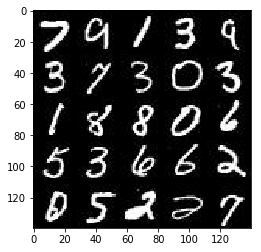

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

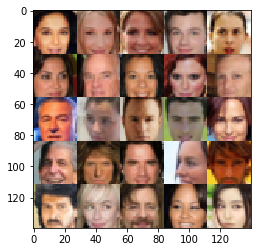

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    
    learning_rate = tf.placeholder(tf.float32, None, name='learning_rate')
    
    return input_real, input_z, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='SAME')
        relu1 = tf.maximum(0.01 * x1, x1)
     
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='SAME')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.01 * bn2, bn2)
        
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='SAME')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.01 * bn3, bn3)
     

        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
    
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7,7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.01*x1, x1)
      
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=1, padding='SAME')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.01*x2, x2)
   
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.01*x3, x3)
    
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='SAME')
      
        out = tf.tanh(logits)
   
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    gen_model = generator(input_z, out_channel_dim)
    
    dis_model_real, dis_logits_real = discriminator(input_real)
    
    dis_model_fake, dis_logits_fake = discriminator(gen_model, reuse=True)
    
    dis_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_real, labels=tf.ones_like(dis_logits_real) * 0.9))
    
    dis_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake, labels=tf.zeros_like(dis_logits_fake)))
    
    dis_loss = dis_loss_real + dis_loss_fake
    
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_logits_fake, labels=tf.ones_like(dis_logits_fake)))
    
    return dis_loss, gen_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    with tf.control_dependencies(update_ops):
        
        t_vars = tf.trainable_variables()
        
        d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
        
        g_vars = [var for var in t_vars if var.name.startswith('generator')]

        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

        return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    
    z_dim = input_z.get_shape().as_list()[-1]
    
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    out_channel_dim = 3 if data_image_mode == "RGB" else 1
    
    input_real, input_z, l_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, out_channel_dim)
    
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()
    
    losses = []
    
    iteration = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                # TODO: Train Model
                iteration += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                
                if iteration % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    losses.append((train_loss_d, train_loss_g))
                    
                    print("Epoch {}/{}, iteration {}:".format(epoch_i + 1, epochs, iteration),
                          "Discriminator Loss: {:.4f},".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if iteration % 100 == 0:
                     show_generator_output(sess, 25, input_z, out_channel_dim, data_image_mode)

        saver.save(sess, './checkpoints/generator.ckpt')
        
    
    
    return losses

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2, iteration 10: Discriminator Loss: 0.5518, Generator Loss: 14.8745
Epoch 1/2, iteration 20: Discriminator Loss: 1.6421, Generator Loss: 10.7494
Epoch 1/2, iteration 30: Discriminator Loss: 0.6175, Generator Loss: 2.9868
Epoch 1/2, iteration 40: Discriminator Loss: 0.4919, Generator Loss: 3.3896
Epoch 1/2, iteration 50: Discriminator Loss: 0.5436, Generator Loss: 1.9190
Epoch 1/2, iteration 60: Discriminator Loss: 0.4867, Generator Loss: 2.8823
Epoch 1/2, iteration 70: Discriminator Loss: 0.4682, Generator Loss: 2.6830
Epoch 1/2, iteration 80: Discriminator Loss: 0.9352, Generator Loss: 1.4274
Epoch 1/2, iteration 90: Discriminator Loss: 1.0155, Generator Loss: 1.6449
Epoch 1/2, iteration 100: Discriminator Loss: 1.4050, Generator Loss: 0.5858


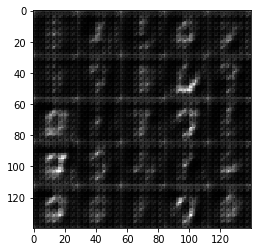

Epoch 1/2, iteration 110: Discriminator Loss: 1.5165, Generator Loss: 3.5121
Epoch 1/2, iteration 120: Discriminator Loss: 1.1521, Generator Loss: 2.1925
Epoch 1/2, iteration 130: Discriminator Loss: 1.2243, Generator Loss: 0.6875
Epoch 1/2, iteration 140: Discriminator Loss: 1.2688, Generator Loss: 0.8297
Epoch 1/2, iteration 150: Discriminator Loss: 1.1619, Generator Loss: 0.8198
Epoch 1/2, iteration 160: Discriminator Loss: 1.2781, Generator Loss: 1.3703
Epoch 1/2, iteration 170: Discriminator Loss: 1.5078, Generator Loss: 0.4821
Epoch 1/2, iteration 180: Discriminator Loss: 1.5934, Generator Loss: 1.8981
Epoch 1/2, iteration 190: Discriminator Loss: 1.3161, Generator Loss: 0.6272
Epoch 1/2, iteration 200: Discriminator Loss: 1.2388, Generator Loss: 0.6736


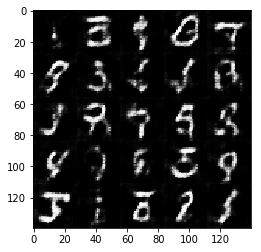

Epoch 1/2, iteration 210: Discriminator Loss: 1.1144, Generator Loss: 1.1277
Epoch 1/2, iteration 220: Discriminator Loss: 1.7231, Generator Loss: 2.6827
Epoch 1/2, iteration 230: Discriminator Loss: 1.2152, Generator Loss: 0.7070
Epoch 1/2, iteration 240: Discriminator Loss: 1.2604, Generator Loss: 0.7359
Epoch 1/2, iteration 250: Discriminator Loss: 1.1834, Generator Loss: 1.1559
Epoch 1/2, iteration 260: Discriminator Loss: 1.1124, Generator Loss: 0.9615
Epoch 1/2, iteration 270: Discriminator Loss: 1.0909, Generator Loss: 1.0020
Epoch 1/2, iteration 280: Discriminator Loss: 1.1336, Generator Loss: 1.1628
Epoch 1/2, iteration 290: Discriminator Loss: 1.1010, Generator Loss: 1.1823
Epoch 1/2, iteration 300: Discriminator Loss: 1.1067, Generator Loss: 0.9746


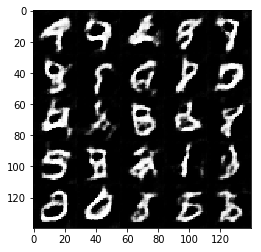

Epoch 1/2, iteration 310: Discriminator Loss: 1.3810, Generator Loss: 2.0750
Epoch 1/2, iteration 320: Discriminator Loss: 1.1496, Generator Loss: 0.7870
Epoch 1/2, iteration 330: Discriminator Loss: 1.1897, Generator Loss: 0.8122
Epoch 1/2, iteration 340: Discriminator Loss: 1.2465, Generator Loss: 0.6452
Epoch 1/2, iteration 350: Discriminator Loss: 1.2144, Generator Loss: 1.2758
Epoch 1/2, iteration 360: Discriminator Loss: 1.1963, Generator Loss: 1.4328
Epoch 1/2, iteration 370: Discriminator Loss: 1.1348, Generator Loss: 0.8927
Epoch 1/2, iteration 380: Discriminator Loss: 2.4555, Generator Loss: 2.7277
Epoch 1/2, iteration 390: Discriminator Loss: 1.1384, Generator Loss: 0.9050
Epoch 1/2, iteration 400: Discriminator Loss: 1.2045, Generator Loss: 0.8603


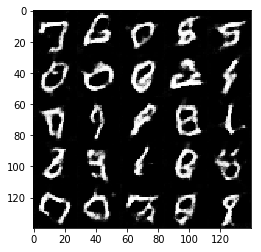

Epoch 1/2, iteration 410: Discriminator Loss: 1.1625, Generator Loss: 0.9983
Epoch 1/2, iteration 420: Discriminator Loss: 1.5119, Generator Loss: 0.4568
Epoch 1/2, iteration 430: Discriminator Loss: 1.1276, Generator Loss: 0.9428
Epoch 1/2, iteration 440: Discriminator Loss: 2.3529, Generator Loss: 0.1721
Epoch 1/2, iteration 450: Discriminator Loss: 1.1578, Generator Loss: 0.9644
Epoch 1/2, iteration 460: Discriminator Loss: 1.2400, Generator Loss: 0.6324
Epoch 2/2, iteration 470: Discriminator Loss: 1.2422, Generator Loss: 0.7577
Epoch 2/2, iteration 480: Discriminator Loss: 1.0811, Generator Loss: 0.9281
Epoch 2/2, iteration 490: Discriminator Loss: 1.1322, Generator Loss: 1.0774
Epoch 2/2, iteration 500: Discriminator Loss: 1.2252, Generator Loss: 0.7535


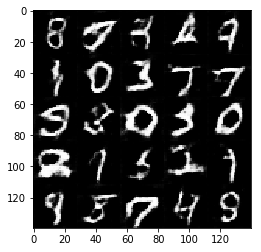

Epoch 2/2, iteration 510: Discriminator Loss: 1.1896, Generator Loss: 0.8157
Epoch 2/2, iteration 520: Discriminator Loss: 1.4204, Generator Loss: 1.9232
Epoch 2/2, iteration 530: Discriminator Loss: 1.1852, Generator Loss: 0.8659
Epoch 2/2, iteration 540: Discriminator Loss: 3.0475, Generator Loss: 3.8622
Epoch 2/2, iteration 550: Discriminator Loss: 1.1710, Generator Loss: 0.9179
Epoch 2/2, iteration 560: Discriminator Loss: 1.1244, Generator Loss: 1.0997
Epoch 2/2, iteration 570: Discriminator Loss: 1.1385, Generator Loss: 1.3555
Epoch 2/2, iteration 580: Discriminator Loss: 1.5964, Generator Loss: 0.4581
Epoch 2/2, iteration 590: Discriminator Loss: 1.2861, Generator Loss: 0.6660
Epoch 2/2, iteration 600: Discriminator Loss: 1.1263, Generator Loss: 1.3520


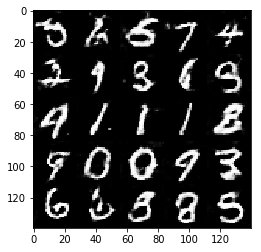

Epoch 2/2, iteration 610: Discriminator Loss: 1.8274, Generator Loss: 0.3121
Epoch 2/2, iteration 620: Discriminator Loss: 1.0668, Generator Loss: 1.0727
Epoch 2/2, iteration 630: Discriminator Loss: 1.1329, Generator Loss: 1.1871
Epoch 2/2, iteration 640: Discriminator Loss: 1.1704, Generator Loss: 1.6452
Epoch 2/2, iteration 650: Discriminator Loss: 1.1158, Generator Loss: 0.7942
Epoch 2/2, iteration 660: Discriminator Loss: 1.2308, Generator Loss: 0.7264
Epoch 2/2, iteration 670: Discriminator Loss: 1.1714, Generator Loss: 1.0218
Epoch 2/2, iteration 680: Discriminator Loss: 1.1911, Generator Loss: 1.8941
Epoch 2/2, iteration 690: Discriminator Loss: 1.0823, Generator Loss: 0.9372
Epoch 2/2, iteration 700: Discriminator Loss: 1.3112, Generator Loss: 0.5769


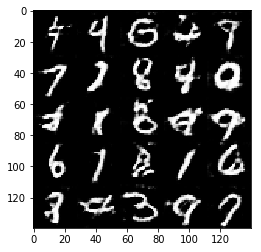

Epoch 2/2, iteration 710: Discriminator Loss: 1.0497, Generator Loss: 1.0808
Epoch 2/2, iteration 720: Discriminator Loss: 1.0090, Generator Loss: 1.3452
Epoch 2/2, iteration 730: Discriminator Loss: 1.1374, Generator Loss: 0.8284
Epoch 2/2, iteration 740: Discriminator Loss: 1.2642, Generator Loss: 0.6504
Epoch 2/2, iteration 750: Discriminator Loss: 1.0893, Generator Loss: 1.8304
Epoch 2/2, iteration 760: Discriminator Loss: 1.2181, Generator Loss: 0.7355
Epoch 2/2, iteration 770: Discriminator Loss: 1.0836, Generator Loss: 1.0946
Epoch 2/2, iteration 780: Discriminator Loss: 1.2297, Generator Loss: 0.7123
Epoch 2/2, iteration 790: Discriminator Loss: 1.2092, Generator Loss: 1.1577
Epoch 2/2, iteration 800: Discriminator Loss: 1.1260, Generator Loss: 0.8050


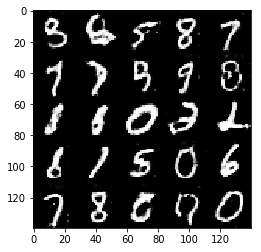

Epoch 2/2, iteration 810: Discriminator Loss: 1.4428, Generator Loss: 2.0985
Epoch 2/2, iteration 820: Discriminator Loss: 1.2336, Generator Loss: 0.6704
Epoch 2/2, iteration 830: Discriminator Loss: 1.0204, Generator Loss: 0.9604
Epoch 2/2, iteration 840: Discriminator Loss: 1.2553, Generator Loss: 0.7682
Epoch 2/2, iteration 850: Discriminator Loss: 1.1008, Generator Loss: 0.9994
Epoch 2/2, iteration 860: Discriminator Loss: 1.0022, Generator Loss: 1.2888
Epoch 2/2, iteration 870: Discriminator Loss: 0.9952, Generator Loss: 1.0773
Epoch 2/2, iteration 880: Discriminator Loss: 1.3450, Generator Loss: 1.3700
Epoch 2/2, iteration 890: Discriminator Loss: 1.2687, Generator Loss: 0.8031
Epoch 2/2, iteration 900: Discriminator Loss: 1.2351, Generator Loss: 0.8434


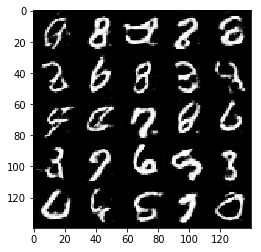

Epoch 2/2, iteration 910: Discriminator Loss: 1.1287, Generator Loss: 0.9923
Epoch 2/2, iteration 920: Discriminator Loss: 1.2734, Generator Loss: 0.6369
Epoch 2/2, iteration 930: Discriminator Loss: 1.3513, Generator Loss: 1.8029


ValueError: Parent directory of ./checkpoints/generator.ckpt doesn't exist, can't save.

In [14]:
batch_size = 128
z_dim = 128
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1, iteration 10: Discriminator Loss: 1.7459, Generator Loss: 0.4674
Epoch 1/1, iteration 20: Discriminator Loss: 1.1525, Generator Loss: 0.7643
Epoch 1/1, iteration 30: Discriminator Loss: 0.8556, Generator Loss: 1.2952
Epoch 1/1, iteration 40: Discriminator Loss: 0.6217, Generator Loss: 1.8423
Epoch 1/1, iteration 50: Discriminator Loss: 0.5824, Generator Loss: 1.9654
Epoch 1/1, iteration 60: Discriminator Loss: 0.5339, Generator Loss: 2.1720
Epoch 1/1, iteration 70: Discriminator Loss: 0.5781, Generator Loss: 4.1245
Epoch 1/1, iteration 80: Discriminator Loss: 0.5440, Generator Loss: 3.0373
Epoch 1/1, iteration 90: Discriminator Loss: 0.4863, Generator Loss: 2.6100
Epoch 1/1, iteration 100: Discriminator Loss: 0.4988, Generator Loss: 2.3013


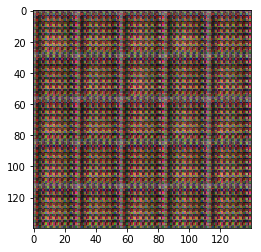

Epoch 1/1, iteration 110: Discriminator Loss: 1.2042, Generator Loss: 0.6820
Epoch 1/1, iteration 120: Discriminator Loss: 0.5599, Generator Loss: 3.0089
Epoch 1/1, iteration 130: Discriminator Loss: 0.4466, Generator Loss: 2.9041
Epoch 1/1, iteration 140: Discriminator Loss: 0.4152, Generator Loss: 3.1609
Epoch 1/1, iteration 150: Discriminator Loss: 0.4229, Generator Loss: 3.1013
Epoch 1/1, iteration 160: Discriminator Loss: 0.4904, Generator Loss: 2.2830
Epoch 1/1, iteration 170: Discriminator Loss: 0.5508, Generator Loss: 2.0607
Epoch 1/1, iteration 180: Discriminator Loss: 0.6182, Generator Loss: 1.9578
Epoch 1/1, iteration 190: Discriminator Loss: 0.6972, Generator Loss: 1.5306
Epoch 1/1, iteration 200: Discriminator Loss: 0.8833, Generator Loss: 1.2300


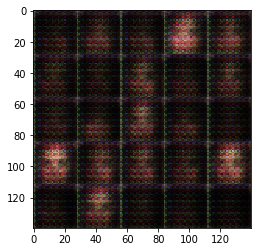

Epoch 1/1, iteration 210: Discriminator Loss: 0.6709, Generator Loss: 1.8377
Epoch 1/1, iteration 220: Discriminator Loss: 0.7602, Generator Loss: 1.8925
Epoch 1/1, iteration 230: Discriminator Loss: 0.8735, Generator Loss: 1.1018
Epoch 1/1, iteration 240: Discriminator Loss: 0.8693, Generator Loss: 4.2271
Epoch 1/1, iteration 250: Discriminator Loss: 0.7839, Generator Loss: 1.4451
Epoch 1/1, iteration 260: Discriminator Loss: 0.7425, Generator Loss: 1.5189
Epoch 1/1, iteration 270: Discriminator Loss: 0.6514, Generator Loss: 2.4033
Epoch 1/1, iteration 280: Discriminator Loss: 0.8990, Generator Loss: 1.4599
Epoch 1/1, iteration 290: Discriminator Loss: 0.8210, Generator Loss: 1.2398
Epoch 1/1, iteration 300: Discriminator Loss: 0.6766, Generator Loss: 1.8365


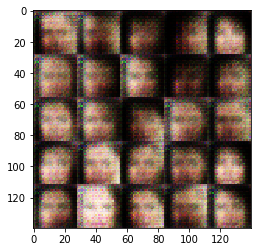

Epoch 1/1, iteration 310: Discriminator Loss: 0.8225, Generator Loss: 2.1668
Epoch 1/1, iteration 320: Discriminator Loss: 1.0179, Generator Loss: 0.9568
Epoch 1/1, iteration 330: Discriminator Loss: 0.8654, Generator Loss: 1.3919
Epoch 1/1, iteration 340: Discriminator Loss: 1.0435, Generator Loss: 1.6628
Epoch 1/1, iteration 350: Discriminator Loss: 0.9670, Generator Loss: 1.3989
Epoch 1/1, iteration 360: Discriminator Loss: 0.7649, Generator Loss: 1.8338
Epoch 1/1, iteration 370: Discriminator Loss: 0.8445, Generator Loss: 1.2481
Epoch 1/1, iteration 380: Discriminator Loss: 0.8947, Generator Loss: 1.7848
Epoch 1/1, iteration 390: Discriminator Loss: 0.8740, Generator Loss: 1.2608
Epoch 1/1, iteration 400: Discriminator Loss: 0.8225, Generator Loss: 1.4055


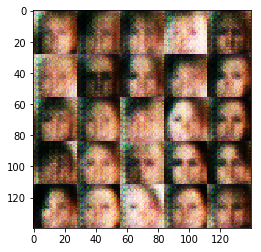

Epoch 1/1, iteration 410: Discriminator Loss: 0.7985, Generator Loss: 1.3764
Epoch 1/1, iteration 420: Discriminator Loss: 1.0695, Generator Loss: 2.4709
Epoch 1/1, iteration 430: Discriminator Loss: 1.0123, Generator Loss: 1.0302
Epoch 1/1, iteration 440: Discriminator Loss: 0.8149, Generator Loss: 1.3917
Epoch 1/1, iteration 450: Discriminator Loss: 0.7799, Generator Loss: 1.8055
Epoch 1/1, iteration 460: Discriminator Loss: 1.0141, Generator Loss: 1.2220
Epoch 1/1, iteration 470: Discriminator Loss: 1.1415, Generator Loss: 1.6200
Epoch 1/1, iteration 480: Discriminator Loss: 1.0259, Generator Loss: 1.4874
Epoch 1/1, iteration 490: Discriminator Loss: 1.0885, Generator Loss: 1.0274
Epoch 1/1, iteration 500: Discriminator Loss: 0.8478, Generator Loss: 1.4768


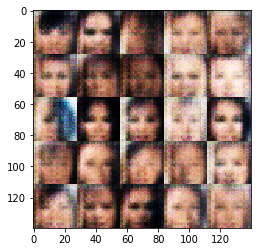

Epoch 1/1, iteration 510: Discriminator Loss: 0.8815, Generator Loss: 1.3015
Epoch 1/1, iteration 520: Discriminator Loss: 1.0022, Generator Loss: 0.9649
Epoch 1/1, iteration 530: Discriminator Loss: 0.8576, Generator Loss: 1.5111
Epoch 1/1, iteration 540: Discriminator Loss: 1.0278, Generator Loss: 0.9489
Epoch 1/1, iteration 550: Discriminator Loss: 1.4064, Generator Loss: 0.5711
Epoch 1/1, iteration 560: Discriminator Loss: 1.2530, Generator Loss: 2.6871
Epoch 1/1, iteration 570: Discriminator Loss: 1.0035, Generator Loss: 1.7161
Epoch 1/1, iteration 580: Discriminator Loss: 0.9181, Generator Loss: 1.2796
Epoch 1/1, iteration 590: Discriminator Loss: 1.0641, Generator Loss: 1.4708
Epoch 1/1, iteration 600: Discriminator Loss: 0.9489, Generator Loss: 1.3893


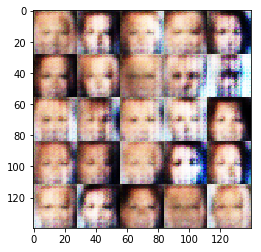

Epoch 1/1, iteration 610: Discriminator Loss: 1.2805, Generator Loss: 0.7353
Epoch 1/1, iteration 620: Discriminator Loss: 0.9160, Generator Loss: 1.0304
Epoch 1/1, iteration 630: Discriminator Loss: 0.8583, Generator Loss: 1.4171
Epoch 1/1, iteration 640: Discriminator Loss: 1.1309, Generator Loss: 0.9191
Epoch 1/1, iteration 650: Discriminator Loss: 1.2886, Generator Loss: 1.5049
Epoch 1/1, iteration 660: Discriminator Loss: 0.7537, Generator Loss: 1.5805
Epoch 1/1, iteration 670: Discriminator Loss: 0.9037, Generator Loss: 1.1572
Epoch 1/1, iteration 680: Discriminator Loss: 1.0297, Generator Loss: 0.8992
Epoch 1/1, iteration 690: Discriminator Loss: 1.1575, Generator Loss: 1.5486
Epoch 1/1, iteration 700: Discriminator Loss: 0.9753, Generator Loss: 1.6703


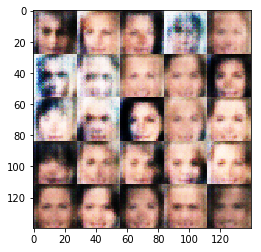

Epoch 1/1, iteration 710: Discriminator Loss: 0.9912, Generator Loss: 1.2285
Epoch 1/1, iteration 720: Discriminator Loss: 0.9826, Generator Loss: 1.0512
Epoch 1/1, iteration 730: Discriminator Loss: 0.9406, Generator Loss: 1.2771
Epoch 1/1, iteration 740: Discriminator Loss: 0.9464, Generator Loss: 1.5495
Epoch 1/1, iteration 750: Discriminator Loss: 0.9515, Generator Loss: 1.3202
Epoch 1/1, iteration 760: Discriminator Loss: 0.8277, Generator Loss: 2.1302
Epoch 1/1, iteration 770: Discriminator Loss: 0.8677, Generator Loss: 1.3206
Epoch 1/1, iteration 780: Discriminator Loss: 1.0741, Generator Loss: 1.4792
Epoch 1/1, iteration 790: Discriminator Loss: 0.8867, Generator Loss: 1.6652
Epoch 1/1, iteration 800: Discriminator Loss: 1.0285, Generator Loss: 1.2505


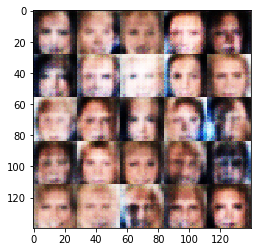

Epoch 1/1, iteration 810: Discriminator Loss: 0.9730, Generator Loss: 0.9807
Epoch 1/1, iteration 820: Discriminator Loss: 1.2383, Generator Loss: 0.7571
Epoch 1/1, iteration 830: Discriminator Loss: 1.0654, Generator Loss: 1.2274
Epoch 1/1, iteration 840: Discriminator Loss: 0.9791, Generator Loss: 1.0742
Epoch 1/1, iteration 850: Discriminator Loss: 1.0664, Generator Loss: 1.2715
Epoch 1/1, iteration 860: Discriminator Loss: 1.0252, Generator Loss: 1.1275
Epoch 1/1, iteration 870: Discriminator Loss: 1.3863, Generator Loss: 0.6611
Epoch 1/1, iteration 880: Discriminator Loss: 1.1045, Generator Loss: 1.0194
Epoch 1/1, iteration 890: Discriminator Loss: 0.8719, Generator Loss: 1.4255
Epoch 1/1, iteration 900: Discriminator Loss: 0.9644, Generator Loss: 1.8194


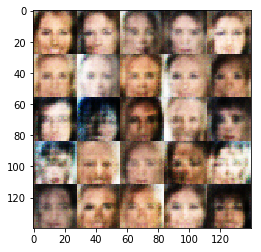

Epoch 1/1, iteration 910: Discriminator Loss: 1.0207, Generator Loss: 1.2425
Epoch 1/1, iteration 920: Discriminator Loss: 1.2187, Generator Loss: 0.8044
Epoch 1/1, iteration 930: Discriminator Loss: 1.0442, Generator Loss: 0.9102
Epoch 1/1, iteration 940: Discriminator Loss: 1.0593, Generator Loss: 1.2129
Epoch 1/1, iteration 950: Discriminator Loss: 1.1868, Generator Loss: 0.8543
Epoch 1/1, iteration 960: Discriminator Loss: 0.9721, Generator Loss: 1.1210
Epoch 1/1, iteration 970: Discriminator Loss: 1.1290, Generator Loss: 0.9448
Epoch 1/1, iteration 980: Discriminator Loss: 1.0370, Generator Loss: 1.1130
Epoch 1/1, iteration 990: Discriminator Loss: 1.1455, Generator Loss: 0.8998
Epoch 1/1, iteration 1000: Discriminator Loss: 1.1016, Generator Loss: 0.9547


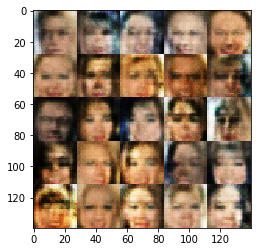

Epoch 1/1, iteration 1010: Discriminator Loss: 1.1531, Generator Loss: 0.8063
Epoch 1/1, iteration 1020: Discriminator Loss: 1.1823, Generator Loss: 0.7852
Epoch 1/1, iteration 1030: Discriminator Loss: 1.2447, Generator Loss: 0.6402
Epoch 1/1, iteration 1040: Discriminator Loss: 1.1812, Generator Loss: 0.8062
Epoch 1/1, iteration 1050: Discriminator Loss: 0.9979, Generator Loss: 1.1523
Epoch 1/1, iteration 1060: Discriminator Loss: 1.2400, Generator Loss: 0.7819
Epoch 1/1, iteration 1070: Discriminator Loss: 0.9812, Generator Loss: 1.0559
Epoch 1/1, iteration 1080: Discriminator Loss: 1.3678, Generator Loss: 0.5619
Epoch 1/1, iteration 1090: Discriminator Loss: 1.0016, Generator Loss: 0.9041
Epoch 1/1, iteration 1100: Discriminator Loss: 1.2591, Generator Loss: 0.8353


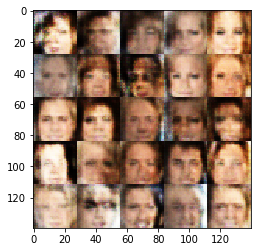

Epoch 1/1, iteration 1110: Discriminator Loss: 1.0165, Generator Loss: 1.0506
Epoch 1/1, iteration 1120: Discriminator Loss: 0.9704, Generator Loss: 1.1428
Epoch 1/1, iteration 1130: Discriminator Loss: 0.9788, Generator Loss: 1.3810
Epoch 1/1, iteration 1140: Discriminator Loss: 0.9739, Generator Loss: 1.3350
Epoch 1/1, iteration 1150: Discriminator Loss: 1.0259, Generator Loss: 1.1097
Epoch 1/1, iteration 1160: Discriminator Loss: 1.0299, Generator Loss: 1.0428
Epoch 1/1, iteration 1170: Discriminator Loss: 1.0437, Generator Loss: 1.3879
Epoch 1/1, iteration 1180: Discriminator Loss: 1.1041, Generator Loss: 0.8070
Epoch 1/1, iteration 1190: Discriminator Loss: 1.0624, Generator Loss: 0.9753
Epoch 1/1, iteration 1200: Discriminator Loss: 1.0613, Generator Loss: 1.0070


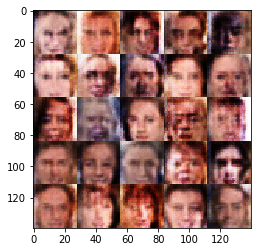

Epoch 1/1, iteration 1210: Discriminator Loss: 1.2797, Generator Loss: 0.7317
Epoch 1/1, iteration 1220: Discriminator Loss: 1.0056, Generator Loss: 1.1030
Epoch 1/1, iteration 1230: Discriminator Loss: 0.8872, Generator Loss: 1.6083
Epoch 1/1, iteration 1240: Discriminator Loss: 0.9639, Generator Loss: 1.0327
Epoch 1/1, iteration 1250: Discriminator Loss: 1.0578, Generator Loss: 1.1491
Epoch 1/1, iteration 1260: Discriminator Loss: 1.1370, Generator Loss: 1.0635
Epoch 1/1, iteration 1270: Discriminator Loss: 1.1061, Generator Loss: 1.1749
Epoch 1/1, iteration 1280: Discriminator Loss: 1.1738, Generator Loss: 0.7779
Epoch 1/1, iteration 1290: Discriminator Loss: 1.2401, Generator Loss: 0.7823
Epoch 1/1, iteration 1300: Discriminator Loss: 1.2348, Generator Loss: 0.7931


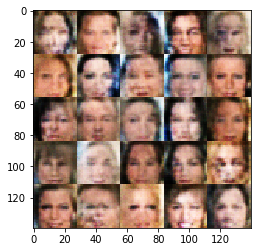

Epoch 1/1, iteration 1310: Discriminator Loss: 1.1983, Generator Loss: 0.9150
Epoch 1/1, iteration 1320: Discriminator Loss: 1.0165, Generator Loss: 1.3260
Epoch 1/1, iteration 1330: Discriminator Loss: 1.0391, Generator Loss: 0.9384
Epoch 1/1, iteration 1340: Discriminator Loss: 0.9737, Generator Loss: 1.0725
Epoch 1/1, iteration 1350: Discriminator Loss: 1.5085, Generator Loss: 0.4520
Epoch 1/1, iteration 1360: Discriminator Loss: 1.1748, Generator Loss: 1.1648
Epoch 1/1, iteration 1370: Discriminator Loss: 1.0476, Generator Loss: 1.0163
Epoch 1/1, iteration 1380: Discriminator Loss: 0.9820, Generator Loss: 1.0895
Epoch 1/1, iteration 1390: Discriminator Loss: 1.0916, Generator Loss: 1.5269
Epoch 1/1, iteration 1400: Discriminator Loss: 1.1743, Generator Loss: 0.7333


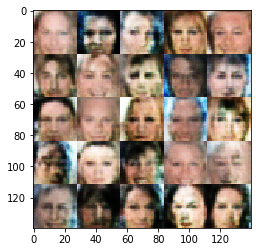

Epoch 1/1, iteration 1410: Discriminator Loss: 1.0831, Generator Loss: 0.9210
Epoch 1/1, iteration 1420: Discriminator Loss: 1.0333, Generator Loss: 0.9405
Epoch 1/1, iteration 1430: Discriminator Loss: 1.1820, Generator Loss: 0.8233
Epoch 1/1, iteration 1440: Discriminator Loss: 1.1099, Generator Loss: 0.8676
Epoch 1/1, iteration 1450: Discriminator Loss: 1.4608, Generator Loss: 0.4947
Epoch 1/1, iteration 1460: Discriminator Loss: 1.0508, Generator Loss: 0.9483
Epoch 1/1, iteration 1470: Discriminator Loss: 1.3646, Generator Loss: 0.5566
Epoch 1/1, iteration 1480: Discriminator Loss: 1.0422, Generator Loss: 1.1837
Epoch 1/1, iteration 1490: Discriminator Loss: 0.9828, Generator Loss: 1.3340
Epoch 1/1, iteration 1500: Discriminator Loss: 1.5382, Generator Loss: 0.4591


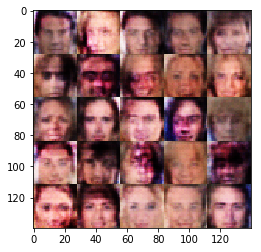

Epoch 1/1, iteration 1510: Discriminator Loss: 1.0056, Generator Loss: 0.9492
Epoch 1/1, iteration 1520: Discriminator Loss: 0.9774, Generator Loss: 1.0174
Epoch 1/1, iteration 1530: Discriminator Loss: 1.2074, Generator Loss: 0.9739
Epoch 1/1, iteration 1540: Discriminator Loss: 0.9248, Generator Loss: 1.4042
Epoch 1/1, iteration 1550: Discriminator Loss: 1.4317, Generator Loss: 0.4965
Epoch 1/1, iteration 1560: Discriminator Loss: 1.3662, Generator Loss: 0.5676
Epoch 1/1, iteration 1570: Discriminator Loss: 1.0253, Generator Loss: 1.1092
Epoch 1/1, iteration 1580: Discriminator Loss: 0.9219, Generator Loss: 1.4192
Epoch 1/1, iteration 1590: Discriminator Loss: 1.0661, Generator Loss: 0.8600
Epoch 1/1, iteration 1600: Discriminator Loss: 1.1105, Generator Loss: 0.9793


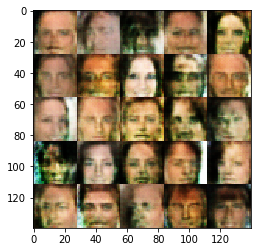

Epoch 1/1, iteration 1610: Discriminator Loss: 1.1538, Generator Loss: 0.8126
Epoch 1/1, iteration 1620: Discriminator Loss: 1.1109, Generator Loss: 0.9511
Epoch 1/1, iteration 1630: Discriminator Loss: 1.3568, Generator Loss: 0.6499
Epoch 1/1, iteration 1640: Discriminator Loss: 1.1433, Generator Loss: 0.8254
Epoch 1/1, iteration 1650: Discriminator Loss: 1.2100, Generator Loss: 0.7500
Epoch 1/1, iteration 1660: Discriminator Loss: 1.2345, Generator Loss: 0.8292
Epoch 1/1, iteration 1670: Discriminator Loss: 1.0005, Generator Loss: 1.3030
Epoch 1/1, iteration 1680: Discriminator Loss: 1.0552, Generator Loss: 1.4204
Epoch 1/1, iteration 1690: Discriminator Loss: 1.0469, Generator Loss: 1.1001
Epoch 1/1, iteration 1700: Discriminator Loss: 1.0509, Generator Loss: 0.9351


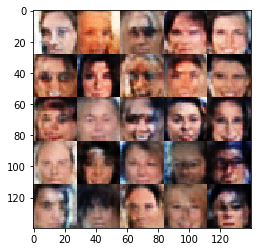

Epoch 1/1, iteration 1710: Discriminator Loss: 1.0398, Generator Loss: 0.9275
Epoch 1/1, iteration 1720: Discriminator Loss: 1.0136, Generator Loss: 1.0907
Epoch 1/1, iteration 1730: Discriminator Loss: 1.2625, Generator Loss: 1.4381
Epoch 1/1, iteration 1740: Discriminator Loss: 1.0743, Generator Loss: 1.3564
Epoch 1/1, iteration 1750: Discriminator Loss: 1.0978, Generator Loss: 1.1182
Epoch 1/1, iteration 1760: Discriminator Loss: 1.1291, Generator Loss: 0.9055
Epoch 1/1, iteration 1770: Discriminator Loss: 1.1101, Generator Loss: 0.8126
Epoch 1/1, iteration 1780: Discriminator Loss: 1.0829, Generator Loss: 1.1013
Epoch 1/1, iteration 1790: Discriminator Loss: 1.3305, Generator Loss: 0.5619
Epoch 1/1, iteration 1800: Discriminator Loss: 0.9420, Generator Loss: 1.1504


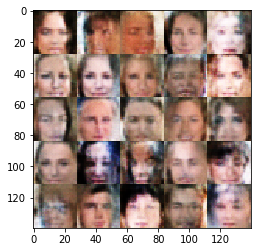

Epoch 1/1, iteration 1810: Discriminator Loss: 1.2727, Generator Loss: 0.5971
Epoch 1/1, iteration 1820: Discriminator Loss: 1.0663, Generator Loss: 1.5214
Epoch 1/1, iteration 1830: Discriminator Loss: 1.0172, Generator Loss: 1.2700
Epoch 1/1, iteration 1840: Discriminator Loss: 1.1292, Generator Loss: 1.0384
Epoch 1/1, iteration 1850: Discriminator Loss: 1.1116, Generator Loss: 0.9063
Epoch 1/1, iteration 1860: Discriminator Loss: 0.9966, Generator Loss: 1.0426
Epoch 1/1, iteration 1870: Discriminator Loss: 1.1909, Generator Loss: 0.9434
Epoch 1/1, iteration 1880: Discriminator Loss: 1.1063, Generator Loss: 0.9187
Epoch 1/1, iteration 1890: Discriminator Loss: 0.9767, Generator Loss: 1.3541
Epoch 1/1, iteration 1900: Discriminator Loss: 1.1976, Generator Loss: 0.7764


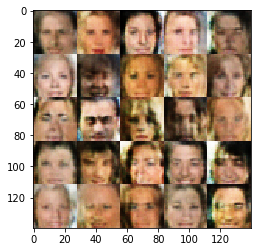

Epoch 1/1, iteration 1910: Discriminator Loss: 1.3149, Generator Loss: 0.8045
Epoch 1/1, iteration 1920: Discriminator Loss: 0.9856, Generator Loss: 1.1574
Epoch 1/1, iteration 1930: Discriminator Loss: 1.0658, Generator Loss: 1.1769
Epoch 1/1, iteration 1940: Discriminator Loss: 1.0182, Generator Loss: 1.1090
Epoch 1/1, iteration 1950: Discriminator Loss: 0.9304, Generator Loss: 1.2418
Epoch 1/1, iteration 1960: Discriminator Loss: 1.1672, Generator Loss: 1.0982
Epoch 1/1, iteration 1970: Discriminator Loss: 1.1591, Generator Loss: 0.7351
Epoch 1/1, iteration 1980: Discriminator Loss: 1.0644, Generator Loss: 0.8559
Epoch 1/1, iteration 1990: Discriminator Loss: 1.1057, Generator Loss: 0.8469
Epoch 1/1, iteration 2000: Discriminator Loss: 0.9146, Generator Loss: 1.0605


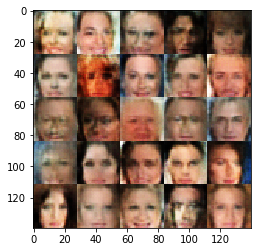

Epoch 1/1, iteration 2010: Discriminator Loss: 1.0864, Generator Loss: 1.0803
Epoch 1/1, iteration 2020: Discriminator Loss: 1.0856, Generator Loss: 0.9953
Epoch 1/1, iteration 2030: Discriminator Loss: 1.0738, Generator Loss: 1.0211
Epoch 1/1, iteration 2040: Discriminator Loss: 1.2015, Generator Loss: 1.0644
Epoch 1/1, iteration 2050: Discriminator Loss: 1.1871, Generator Loss: 0.8797
Epoch 1/1, iteration 2060: Discriminator Loss: 1.1660, Generator Loss: 1.4556
Epoch 1/1, iteration 2070: Discriminator Loss: 1.2204, Generator Loss: 0.8735
Epoch 1/1, iteration 2080: Discriminator Loss: 1.0617, Generator Loss: 0.9063
Epoch 1/1, iteration 2090: Discriminator Loss: 1.1121, Generator Loss: 0.9262
Epoch 1/1, iteration 2100: Discriminator Loss: 1.1039, Generator Loss: 0.8913


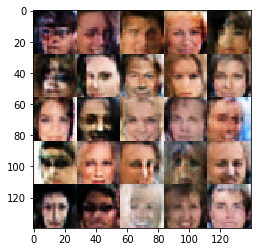

Epoch 1/1, iteration 2110: Discriminator Loss: 0.9804, Generator Loss: 1.6308
Epoch 1/1, iteration 2120: Discriminator Loss: 1.0899, Generator Loss: 1.1344
Epoch 1/1, iteration 2130: Discriminator Loss: 0.9707, Generator Loss: 1.4190
Epoch 1/1, iteration 2140: Discriminator Loss: 1.1080, Generator Loss: 1.1469
Epoch 1/1, iteration 2150: Discriminator Loss: 1.0335, Generator Loss: 0.8799
Epoch 1/1, iteration 2160: Discriminator Loss: 1.3434, Generator Loss: 0.7418
Epoch 1/1, iteration 2170: Discriminator Loss: 1.1230, Generator Loss: 0.8420
Epoch 1/1, iteration 2180: Discriminator Loss: 1.2632, Generator Loss: 0.7435
Epoch 1/1, iteration 2190: Discriminator Loss: 1.2685, Generator Loss: 0.7602
Epoch 1/1, iteration 2200: Discriminator Loss: 1.1951, Generator Loss: 1.1888


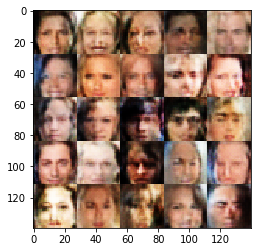

Epoch 1/1, iteration 2210: Discriminator Loss: 1.2566, Generator Loss: 0.8071
Epoch 1/1, iteration 2220: Discriminator Loss: 1.0938, Generator Loss: 0.9981
Epoch 1/1, iteration 2230: Discriminator Loss: 1.0892, Generator Loss: 0.8523
Epoch 1/1, iteration 2240: Discriminator Loss: 1.0905, Generator Loss: 0.9909
Epoch 1/1, iteration 2250: Discriminator Loss: 1.2903, Generator Loss: 0.6180
Epoch 1/1, iteration 2260: Discriminator Loss: 1.2242, Generator Loss: 1.2108
Epoch 1/1, iteration 2270: Discriminator Loss: 1.1817, Generator Loss: 0.7593
Epoch 1/1, iteration 2280: Discriminator Loss: 1.1173, Generator Loss: 0.8441
Epoch 1/1, iteration 2290: Discriminator Loss: 1.1256, Generator Loss: 1.0421
Epoch 1/1, iteration 2300: Discriminator Loss: 0.9872, Generator Loss: 0.9953


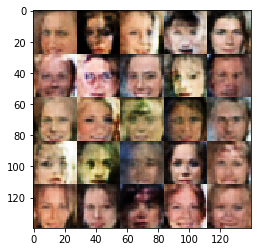

Epoch 1/1, iteration 2310: Discriminator Loss: 1.3038, Generator Loss: 0.6602
Epoch 1/1, iteration 2320: Discriminator Loss: 1.2821, Generator Loss: 0.7420
Epoch 1/1, iteration 2330: Discriminator Loss: 1.1822, Generator Loss: 0.8628
Epoch 1/1, iteration 2340: Discriminator Loss: 1.3495, Generator Loss: 0.6083
Epoch 1/1, iteration 2350: Discriminator Loss: 1.2420, Generator Loss: 0.8517
Epoch 1/1, iteration 2360: Discriminator Loss: 1.1527, Generator Loss: 1.0481
Epoch 1/1, iteration 2370: Discriminator Loss: 0.9992, Generator Loss: 1.2117
Epoch 1/1, iteration 2380: Discriminator Loss: 1.0392, Generator Loss: 0.9882
Epoch 1/1, iteration 2390: Discriminator Loss: 1.0422, Generator Loss: 0.9075
Epoch 1/1, iteration 2400: Discriminator Loss: 1.0800, Generator Loss: 1.0761


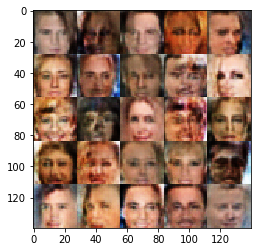

Epoch 1/1, iteration 2410: Discriminator Loss: 1.1974, Generator Loss: 1.3229
Epoch 1/1, iteration 2420: Discriminator Loss: 1.3501, Generator Loss: 1.5984
Epoch 1/1, iteration 2430: Discriminator Loss: 1.0889, Generator Loss: 1.0119
Epoch 1/1, iteration 2440: Discriminator Loss: 1.2543, Generator Loss: 0.8255
Epoch 1/1, iteration 2450: Discriminator Loss: 1.1156, Generator Loss: 0.8598
Epoch 1/1, iteration 2460: Discriminator Loss: 1.1932, Generator Loss: 0.9213
Epoch 1/1, iteration 2470: Discriminator Loss: 1.4285, Generator Loss: 0.5574
Epoch 1/1, iteration 2480: Discriminator Loss: 1.0486, Generator Loss: 1.1490
Epoch 1/1, iteration 2490: Discriminator Loss: 1.1703, Generator Loss: 0.9024
Epoch 1/1, iteration 2500: Discriminator Loss: 0.9828, Generator Loss: 1.3065


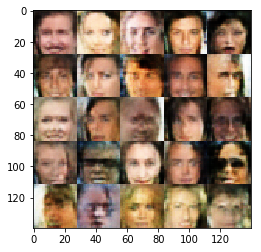

Epoch 1/1, iteration 2510: Discriminator Loss: 0.9643, Generator Loss: 1.0584
Epoch 1/1, iteration 2520: Discriminator Loss: 1.0864, Generator Loss: 1.1340
Epoch 1/1, iteration 2530: Discriminator Loss: 0.9226, Generator Loss: 1.7631
Epoch 1/1, iteration 2540: Discriminator Loss: 1.1161, Generator Loss: 0.8916
Epoch 1/1, iteration 2550: Discriminator Loss: 1.1189, Generator Loss: 1.1246
Epoch 1/1, iteration 2560: Discriminator Loss: 1.2622, Generator Loss: 0.7465
Epoch 1/1, iteration 2570: Discriminator Loss: 1.2588, Generator Loss: 0.6522
Epoch 1/1, iteration 2580: Discriminator Loss: 1.2471, Generator Loss: 0.9155
Epoch 1/1, iteration 2590: Discriminator Loss: 1.1503, Generator Loss: 0.9790
Epoch 1/1, iteration 2600: Discriminator Loss: 0.9550, Generator Loss: 1.0064


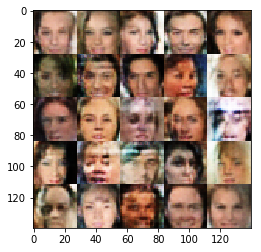

Epoch 1/1, iteration 2610: Discriminator Loss: 1.1052, Generator Loss: 1.0255
Epoch 1/1, iteration 2620: Discriminator Loss: 1.2139, Generator Loss: 0.8638
Epoch 1/1, iteration 2630: Discriminator Loss: 1.3698, Generator Loss: 0.5751
Epoch 1/1, iteration 2640: Discriminator Loss: 1.1832, Generator Loss: 0.7725
Epoch 1/1, iteration 2650: Discriminator Loss: 0.9205, Generator Loss: 1.4735
Epoch 1/1, iteration 2660: Discriminator Loss: 0.9954, Generator Loss: 1.1095
Epoch 1/1, iteration 2670: Discriminator Loss: 1.1254, Generator Loss: 1.0395
Epoch 1/1, iteration 2680: Discriminator Loss: 1.2838, Generator Loss: 0.6480
Epoch 1/1, iteration 2690: Discriminator Loss: 1.0608, Generator Loss: 1.1537
Epoch 1/1, iteration 2700: Discriminator Loss: 1.3747, Generator Loss: 2.0151


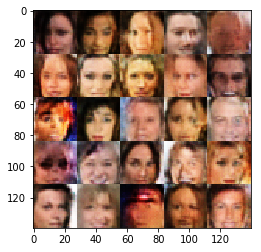

Epoch 1/1, iteration 2710: Discriminator Loss: 0.8753, Generator Loss: 1.1689
Epoch 1/1, iteration 2720: Discriminator Loss: 0.9876, Generator Loss: 1.0376
Epoch 1/1, iteration 2730: Discriminator Loss: 0.7575, Generator Loss: 1.6206
Epoch 1/1, iteration 2740: Discriminator Loss: 1.2364, Generator Loss: 0.6516
Epoch 1/1, iteration 2750: Discriminator Loss: 1.1925, Generator Loss: 0.7166
Epoch 1/1, iteration 2760: Discriminator Loss: 1.0720, Generator Loss: 1.0508
Epoch 1/1, iteration 2770: Discriminator Loss: 1.7430, Generator Loss: 0.3723
Epoch 1/1, iteration 2780: Discriminator Loss: 1.4801, Generator Loss: 0.5001
Epoch 1/1, iteration 2790: Discriminator Loss: 1.2001, Generator Loss: 0.7923
Epoch 1/1, iteration 2800: Discriminator Loss: 1.2591, Generator Loss: 0.6635


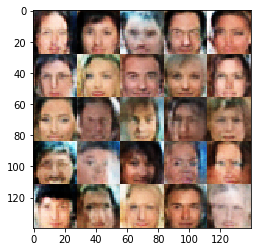

Epoch 1/1, iteration 2810: Discriminator Loss: 1.2094, Generator Loss: 0.7171
Epoch 1/1, iteration 2820: Discriminator Loss: 1.0922, Generator Loss: 0.8868
Epoch 1/1, iteration 2830: Discriminator Loss: 0.9657, Generator Loss: 1.4604
Epoch 1/1, iteration 2840: Discriminator Loss: 1.2457, Generator Loss: 0.7393
Epoch 1/1, iteration 2850: Discriminator Loss: 1.1886, Generator Loss: 0.8572
Epoch 1/1, iteration 2860: Discriminator Loss: 1.1611, Generator Loss: 0.8976
Epoch 1/1, iteration 2870: Discriminator Loss: 1.1045, Generator Loss: 0.9968
Epoch 1/1, iteration 2880: Discriminator Loss: 1.4344, Generator Loss: 0.5452
Epoch 1/1, iteration 2890: Discriminator Loss: 1.2128, Generator Loss: 0.7398
Epoch 1/1, iteration 2900: Discriminator Loss: 0.9981, Generator Loss: 1.0675


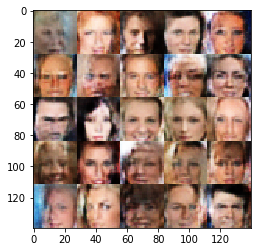

Epoch 1/1, iteration 2910: Discriminator Loss: 1.1130, Generator Loss: 0.8851
Epoch 1/1, iteration 2920: Discriminator Loss: 1.0507, Generator Loss: 1.1876
Epoch 1/1, iteration 2930: Discriminator Loss: 1.1692, Generator Loss: 0.8060
Epoch 1/1, iteration 2940: Discriminator Loss: 1.1309, Generator Loss: 0.7721
Epoch 1/1, iteration 2950: Discriminator Loss: 1.2897, Generator Loss: 0.8710
Epoch 1/1, iteration 2960: Discriminator Loss: 1.1644, Generator Loss: 0.7373
Epoch 1/1, iteration 2970: Discriminator Loss: 1.0379, Generator Loss: 0.9587
Epoch 1/1, iteration 2980: Discriminator Loss: 1.2691, Generator Loss: 0.7228
Epoch 1/1, iteration 2990: Discriminator Loss: 0.8822, Generator Loss: 1.4455
Epoch 1/1, iteration 3000: Discriminator Loss: 1.1892, Generator Loss: 0.8181


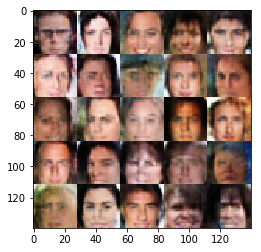

Epoch 1/1, iteration 3010: Discriminator Loss: 0.9900, Generator Loss: 1.1109
Epoch 1/1, iteration 3020: Discriminator Loss: 1.2257, Generator Loss: 0.6627
Epoch 1/1, iteration 3030: Discriminator Loss: 1.0614, Generator Loss: 0.9882
Epoch 1/1, iteration 3040: Discriminator Loss: 0.8916, Generator Loss: 1.2248
Epoch 1/1, iteration 3050: Discriminator Loss: 1.1636, Generator Loss: 0.8088
Epoch 1/1, iteration 3060: Discriminator Loss: 1.2430, Generator Loss: 0.7114
Epoch 1/1, iteration 3070: Discriminator Loss: 1.1306, Generator Loss: 1.1830
Epoch 1/1, iteration 3080: Discriminator Loss: 1.0103, Generator Loss: 1.0109
Epoch 1/1, iteration 3090: Discriminator Loss: 1.1596, Generator Loss: 0.8385
Epoch 1/1, iteration 3100: Discriminator Loss: 1.3189, Generator Loss: 0.6860


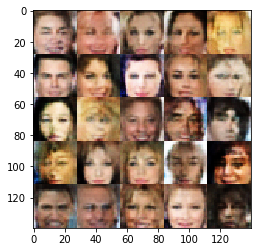

Epoch 1/1, iteration 3110: Discriminator Loss: 1.5480, Generator Loss: 0.4361
Epoch 1/1, iteration 3120: Discriminator Loss: 0.7923, Generator Loss: 1.8511
Epoch 1/1, iteration 3130: Discriminator Loss: 1.0902, Generator Loss: 0.8161
Epoch 1/1, iteration 3140: Discriminator Loss: 1.0445, Generator Loss: 0.8664
Epoch 1/1, iteration 3150: Discriminator Loss: 1.0820, Generator Loss: 1.5204
Epoch 1/1, iteration 3160: Discriminator Loss: 1.4445, Generator Loss: 0.4791


ValueError: Parent directory of ./checkpoints/generator.ckpt doesn't exist, can't save.

In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.